<a href="https://colab.research.google.com/github/7ZEX/ALGORITM/blob/master/homework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

In [ ]:
#преобразуем даты в datetime-объекты

In [ ]:
df = df.drop(['dropoff_datetime'], axis=1)

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [ ]:
#Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [ ]:
plt.hist(df['trip_duration'], bins=15)
plt.title('Гистограмма распределения pickup_datetime')
plt.show()

In [ ]:
#Чтобы его увидеть, добавьте к нашей выборке колонку log_trip_duration (воспользуйтесь np.log1p) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [ ]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df = df.drop('trip_duration', axis=1)

In [ ]:
plt.hist(df['log_trip_duration'], bins=25)
plt.title('Гистограмма распределения log_trip_duration')
plt.show()

In [ ]:
#Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [ ]:
mean_log_trip_duration = ((df['log_trip_duration'] - df['log_trip_duration'].mean())**2).sum()/df['log_trip_duration'].shape[0]
mean_log_trip_duration

In [ ]:
#Постройте график зависимости количества поездок от дня в год

In [ ]:
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear

In [ ]:
daily_rides = df.groupby('pickup_datetime').size()

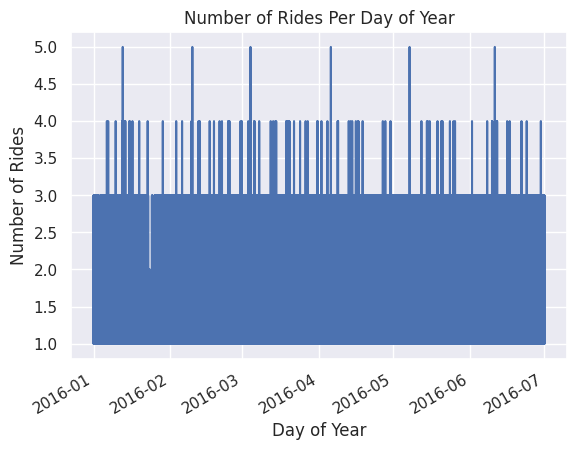

In [20]:
daily_rides.plot(kind='line')
plt.title('Number of Rides Per Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Number of Rides')
plt.show()

In [ ]:
#Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках

In [23]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour_of_day'] = df['pickup_datetime'].dt.hour

In [24]:
rides_per_day_of_week = df.groupby('day_of_week').size()
rides_per_hour_of_day = df.groupby('hour_of_day').size()

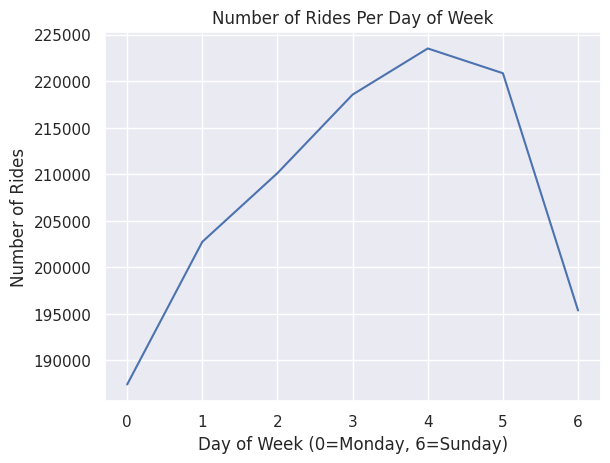

In [25]:
# График зависимости количества поездок от дня недели
rides_per_day_of_week.plot(kind='line')
plt.title('Number of Rides Per Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Rides')
plt.show()

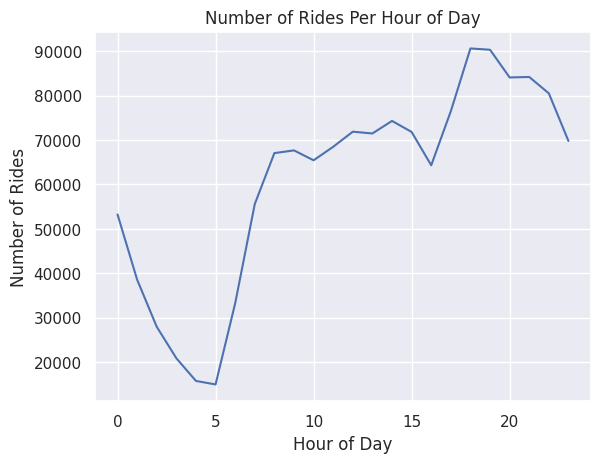

In [26]:
# График зависимости количества поездок от часа в сутках
rides_per_hour_of_day.plot(kind='line')
plt.title('Number of Rides Per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

In [27]:
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour_of_day'] = df['pickup_datetime'].dt.hour

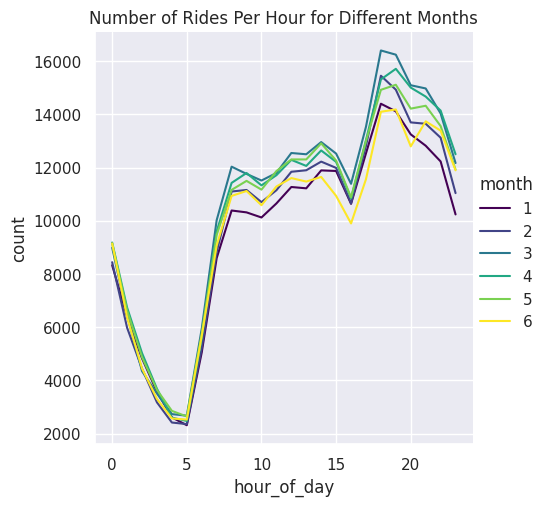

In [28]:
monthly_rides = df.groupby(['month', 'hour_of_day']).size().reset_index(name='count')
sns.relplot(x='hour_of_day', y='count', hue='month', kind='line', data=monthly_rides, palette='viridis')
plt.title('Number of Rides Per Hour for Different Months')
plt.show()


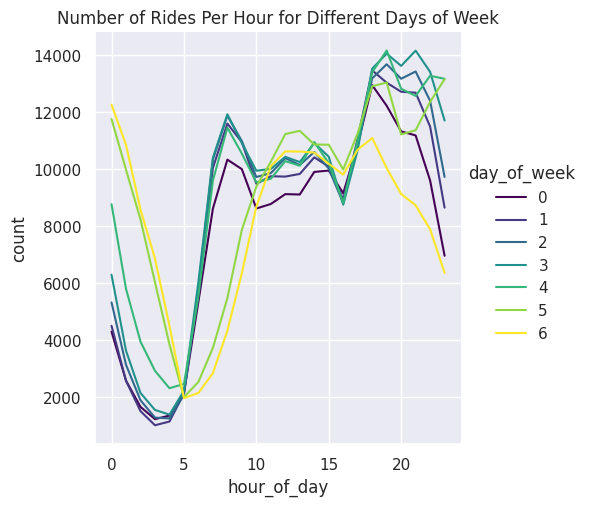

In [30]:
weekday_rides = df.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='count')
sns.relplot(x='hour_of_day', y='count', hue='day_of_week', kind='line', data=weekday_rides, palette='viridis')
plt.title('Number of Rides Per Hour for Different Days of Week')
plt.show()


In [31]:

df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
log_trip_duration     0
day_of_year           0
day_of_week           0
hour_of_day           0
month                 0
dtype: int64

In [32]:
df[df['log_trip_duration'].isnull()]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_year,day_of_week,hour_of_day,month


In [33]:
df.dropna(inplace=True)
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
log_trip_duration     0
day_of_year           0
day_of_week           0
hour_of_day           0
month                 0
dtype: int64

<ipython-input-34-4ce192a02257>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df.drop('log_trip_duration', 1)
<ipython-input-34-4ce192a02257>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_log_trip_duration_of_weekdays = df_train.groupby([weekdays]).mean()


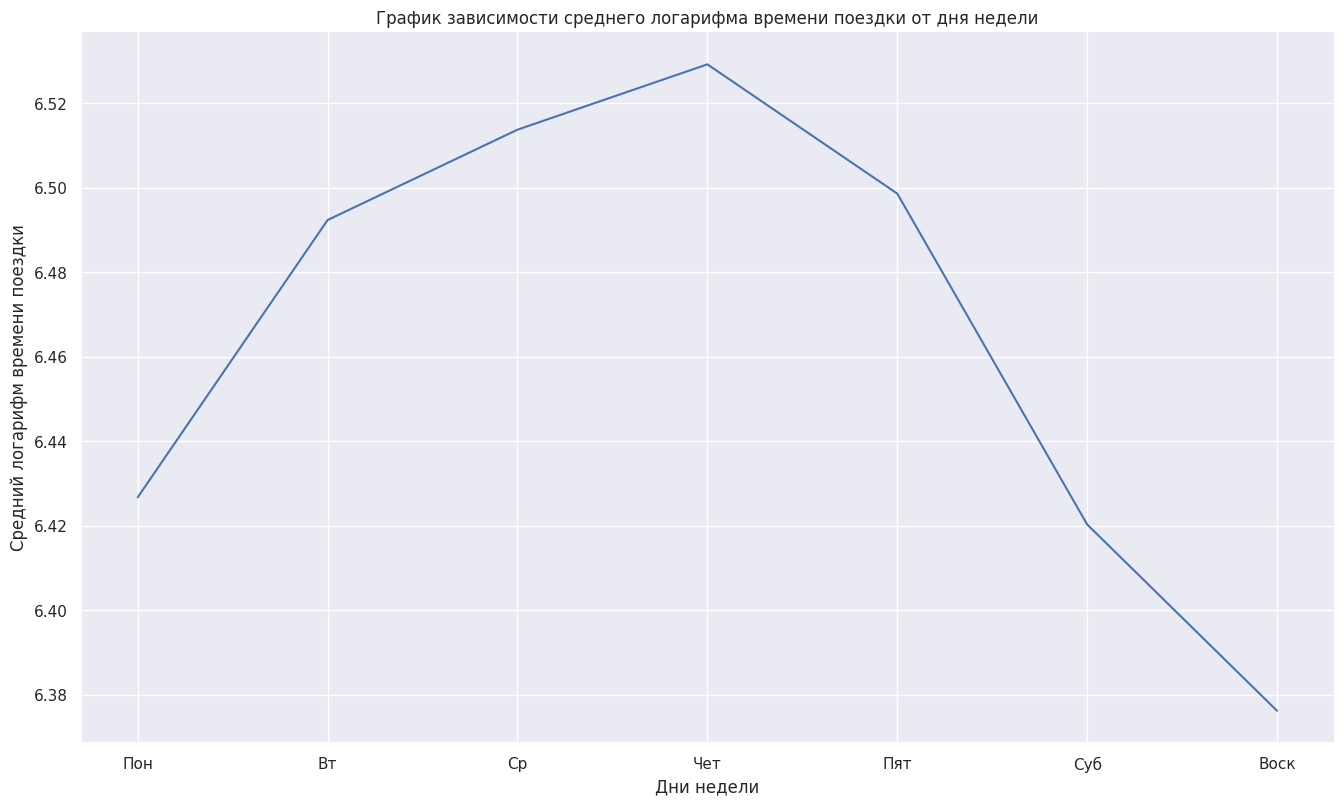

In [34]:
from sklearn.model_selection import train_test_split

X=df.drop('log_trip_duration', 1)
y=df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df_train = X_train.merge(y_train, left_index=True, right_index=True)
weekdays = df_train['pickup_datetime'].dt.dayofweek
mean_log_trip_duration_of_weekdays = df_train.groupby([weekdays]).mean()

mapping = {0:'Пон',1:'Вт',2:'Ср',3:'Чет',4:'Пят',5:'Суб', 6:'Воск'}
mean_log_trip_duration_of_weekdays.index = mean_log_trip_duration_of_weekdays.index.map(mapping)

sns.relplot(
    x=mean_log_trip_duration_of_weekdays.index,
    y=mean_log_trip_duration_of_weekdays['log_trip_duration'],
    height=8,
    aspect=1.7,
    kind="line",
    )

plt.title('График зависимости среднего логарифма времени поездки от дня недели')
plt.ylabel('Средний логарифм времени поездки')
plt.xlabel('Дни недели')

plt.show()


<ipython-input-35-76214b80c65d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_log_trip_duration_of_hours = df_train.groupby([hours]).mean()


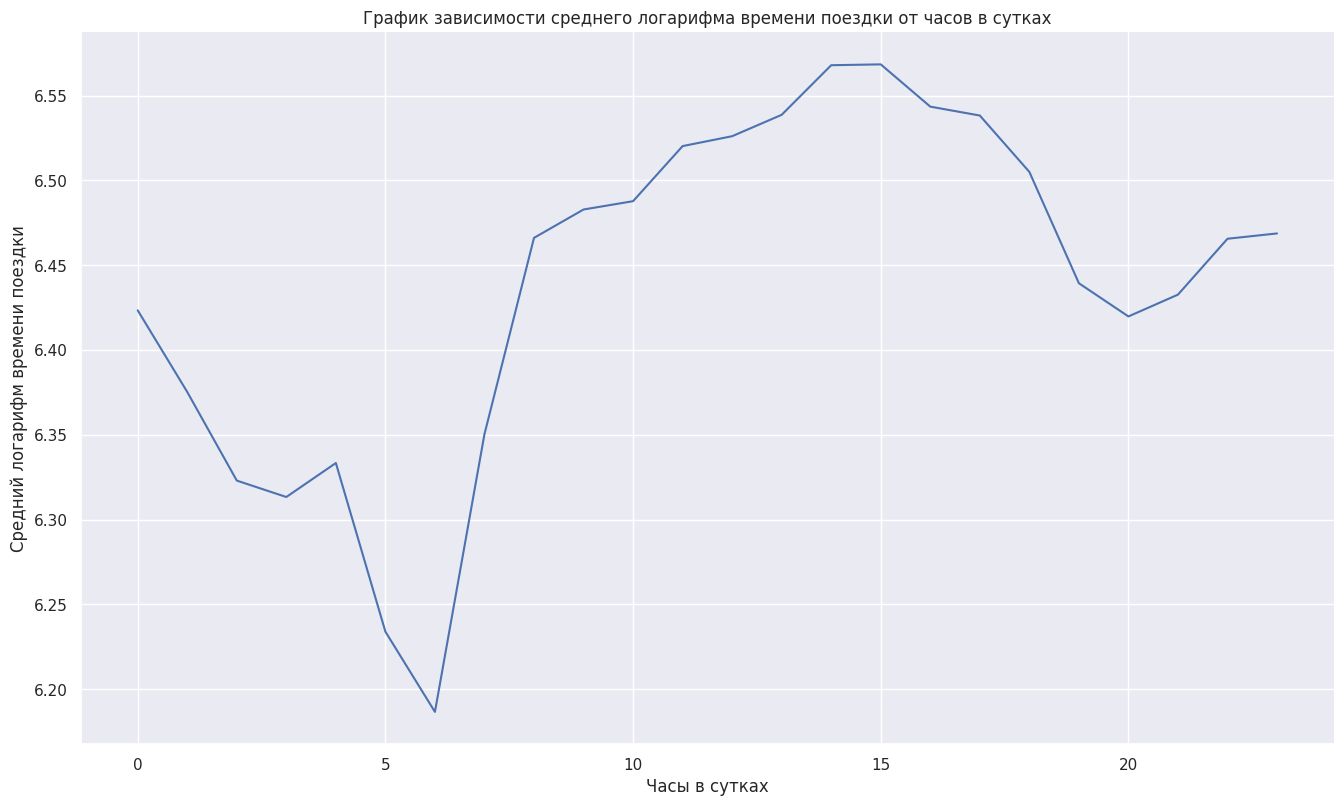

In [35]:
df_train = X_train.merge(y_train, left_index=True, right_index=True)
hours = df_train['pickup_datetime'].dt.hour
mean_log_trip_duration_of_hours = df_train.groupby([hours]).mean()

sns.relplot(
    x=mean_log_trip_duration_of_hours.index,
    y=mean_log_trip_duration_of_hours['log_trip_duration'],
    height=8,
    aspect=1.7,
    kind="line",
    )

plt.title('График зависимости среднего логарифма времени поездки от часов в сутках')
plt.ylabel('Средний логарифм времени поездки')
plt.xlabel('Часы в сутках')

plt.show()

<ipython-input-36-5a42f2016e90>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_log_trip_duration_of_daysofyear = df_train.groupby([daysofyear]).mean()


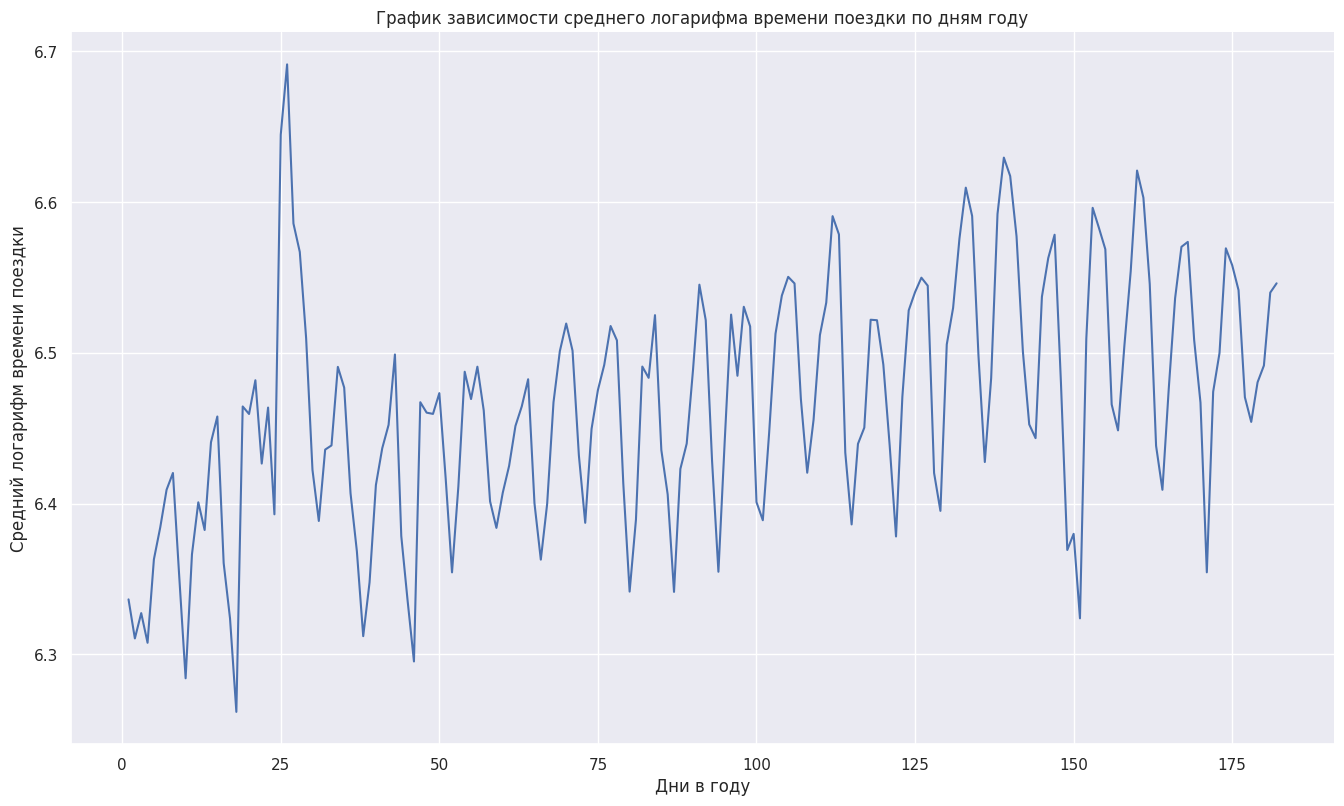

In [36]:
df_train = X_train.merge(y_train, left_index=True, right_index=True)
daysofyear = df_train['pickup_datetime'].dt.dayofyear
mean_log_trip_duration_of_daysofyear = df_train.groupby([daysofyear]).mean()

sns.relplot(
    x=mean_log_trip_duration_of_daysofyear.index,
    y=mean_log_trip_duration_of_daysofyear['log_trip_duration'],
    height=8,
    aspect=1.7,
    kind="line",
    )

# plt.xticks([]) # убрать подпись значений по оси Х
# plt.xlim(0, 49)
plt.title('График зависимости среднего логарифма времени поездки по дням году')
plt.ylabel('Средний логарифм времени поездки')
plt.xlabel('Дни в году')

plt.show()

In [ ]:
#Добавьте следующие признаки на основе pickup_datetime:

In [37]:
def abnormal_date_1(df):
    if (df==23)|(df==24):
        return 1
    return 0

def abnormal_date_2(df):
    if df==151:
        return 1
    return 0

In [38]:
df.loc[:, 'dayofweek'] = df['pickup_datetime'].dt.dayofweek
df.loc[:, 'months'] = df['pickup_datetime'].dt.month
df.loc[:, 'hours'] = df['pickup_datetime'].dt.hour
df.loc[:, 'dayofyear'] = df['pickup_datetime'].dt.dayofyear
df.loc[:, 'abnormal_date_1'] = df['dayofyear'].apply(abnormal_date_1) # 1 период 23-24 января
df.loc[:, 'abnormal_date_2'] = df['dayofyear'].apply(abnormal_date_2) # 2 период 30 мая

In [ ]:
#Обучите Ridge-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью OneHotEncoder. Численные признаки отмасштабируйте с помощью StandardScaler. Используйте только признаки, которые мы выделили в этой части задания.

In [47]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

X=df.drop('log_trip_duration', 1)
y=df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




<ipython-input-47-eca999e3a2bd>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df.drop('log_trip_duration', 1)


In [48]:
categorical = list(X_train[['dayofweek', 'months']].columns)
numeric_features = X_train[['hours', 'dayofyear']].columns

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train.iloc[:, 9:], y_train)
y_pred = model.predict(X_test.iloc[:, 9:])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Constant RMSE = %.4f" % mean_log_trip_duration**0.5)

Test RMSE = 0.7920
Constant RMSE = 0.7958


In [ ]:
#Задание 6

In [49]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [50]:
df.loc[:, 'distance_haversine'] = haversine_array(
    df['pickup_latitude'].values,
    df['pickup_longitude'].values,
    df['dropoff_latitude'].values,
    df['dropoff_longitude'].values
    )

In [51]:
df['log_distance_haversine'] = np.log1p(df['distance_haversine'])

<ipython-input-52-e1ec40db717c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_log_distance_haversine = df.groupby([daysofyear]).mean()


Text(0.5, 1.0, 'distance_haversine')

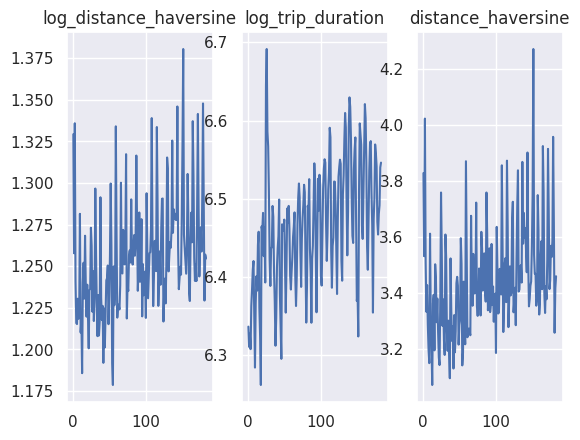

In [52]:
aysofyear = df['pickup_datetime'].dt.dayofyear
mean_log_distance_haversine = df.groupby([daysofyear]).mean()

#1
plt.subplot2grid((1,3), (0,0))
plt.plot(
    mean_log_distance_haversine.index,
    mean_log_distance_haversine['log_distance_haversine'],
    )
plt.title('log_distance_haversine')

#2
plt.subplot2grid((1,3), (0,1))
plt.plot(
    mean_log_distance_haversine.index,
    mean_log_distance_haversine['log_trip_duration'],
    )
plt.title('log_trip_duration')

#3
plt.subplot2grid((1,3), (0,2))
plt.plot(
    mean_log_distance_haversine.index,
    mean_log_distance_haversine['distance_haversine'],
    )
plt.title('distance_haversine')

In [ ]:
#Задание 7

<Axes: >

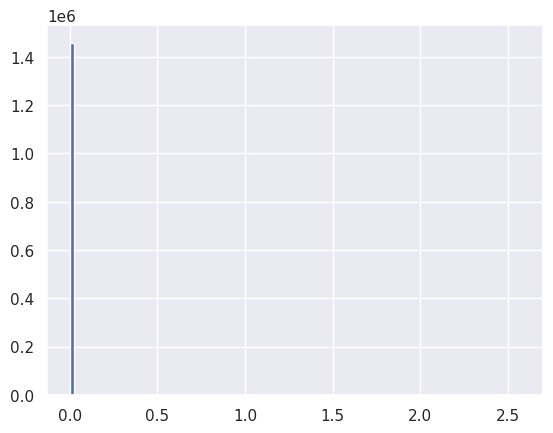

In [53]:
df['speed'] = df['distance_haversine']/np.expm1(df['log_trip_duration']) # в км/c
df['speed'].hist(bins=100)

In [54]:
np.percentile(df['speed'], 99.9)

0.015083881208716047

array([[<Axes: title={'center': 'speed'}>]], dtype=object)

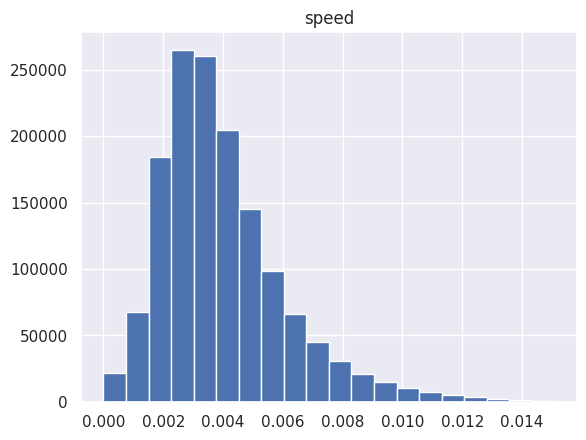

In [55]:
df[df['speed']<np.percentile(df['speed'], 99.9)].hist('speed', bins=20)

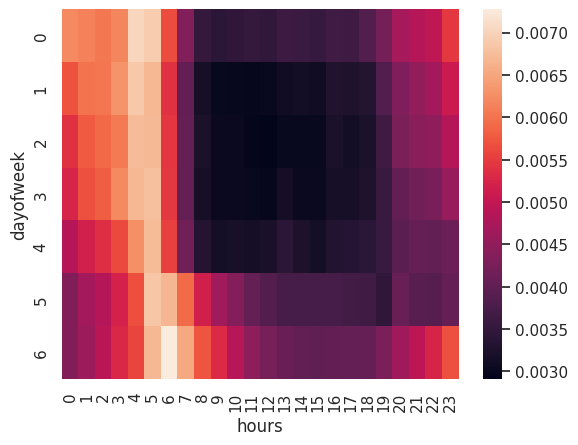

In [56]:

df.loc[:, 'dayofweek'] = df['pickup_datetime'].dt.dayofweek
df.loc[:, 'hours'] = df['pickup_datetime'].dt.hour

df_heatmap = df.pivot_table(
                        index='dayofweek',
                        columns='hours',
                        values='speed',
                        aggfunc='mean',
                        )
sns.heatmap(df_heatmap)

plt.show()

In [57]:
df.drop('speed', 1, inplace=True)
df.head(0)

<ipython-input-57-7a8a163a7254>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('speed', 1, inplace=True)


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,...,hour_of_day,month,dayofweek,months,hours,dayofyear,abnormal_date_1,abnormal_date_2,distance_haversine,log_distance_haversine


In [58]:
def traffic_jams(h, d):
    # [8:18] часов и [1:4] дни (вторник:пятница)- пробки
    return (h>=8)&(h<=18)&(d>=1)&(d<=4)

def free_road(h, d):
    # [1:5] часов и [0:3] дни (понедельник:четверг), [5:6] часов и [5:6] дни - свободные дороги
    return ((h>=1)&(h<=5)&(d>=0)&(d<=3))|((h>=5)&(h<=6)&(d>=5)&(d<=6))

In [59]:
df.loc[:, 'traffic_jams'] = traffic_jams(
    df['hours'].values,
    df['dayofweek'].values
    )
df.loc[:, 'free_road'] = free_road(
    df['hours'].values,
    df['dayofweek'].values
    )
df.replace({True:1, False:0}, inplace=True)

In [ ]:
#Задание 8